(summing-sinusoids)=
# Summing sinusoids

In [1]:
%run ../setup.ipynb

In the previous sections, we've made use of the fact that the samples of a wave at an analysis frequency must sum to zero.
However, we never actually proved this from first principles.

In fact, we can say something a little stronger, and exactly characterize the sum of samples for a wave at any frequency:

```{math}

\sum_{n=0}^{N-1} \cos\left(2\pi \cdot f \cdot \frac{n}{f_s} + \phi \right) \quad = \quad ?
```

Computing this sum requires adding up wave samples, which can be done directly, though it can be tedious.
As we'll see, this is a case where the complex exponential form is more convenient to work with.

## Aside: geometric series

Recall that Euler's formula {eq}`euler` converts between rectangular and polar coordinates:

$$
e^{\mathrm{j}\cdot\theta} = \cos(\theta) + \mathrm{j} \cdot\sin(\theta).
$$

Since this holds for any angle $\theta$, it must also hold for $n\cdot \theta$ as we vary $n$:

$$
e^{\mathrm{j}\cdot n \cdot \theta} = \cos(n \cdot \theta) + \mathrm{j} \cdot\sin(n \cdot \theta),
$$

and by the product rule for exponents, we can re-write the left-hand side as follows:

$$
e^{\mathrm{j}\cdot n \cdot \theta} = \left(e^{\mathrm{j}\cdot \theta}\right)^n.
$$

```{margin}
This trick of turning waves into polynomials is one of the most useful tools in signal processing!
We'll see more of it later on when we cover filtering.
```

This will allow us to turn a summation of wave samples into a summation of the form $z^n$, which is also known as a *geometric series*.
Geometric series have many nice properties, but for now, the one we'll need is a formula for calculating the sum of the first $N$ terms.

````{admonition} Lemma: finite geometric series
:class: information

Let $z \neq 1$ be a complex number, and $N > 0$ be an integer.
Then

```{math}
\sum_{n=0}^{N-1} z^n = \frac{1 - z^N}{1 - z}.
```
````

````{margin}
In code, we can either do:

```python
S = 0
for n in range(N):
    S = S + z**n
```

or

```python
S = (1 - z**N) / (1 - z)
```

The latter will be much faster!
````

In plain language, this lemma says that summing up increasing powers of a number $z$ (even a complex number $z$) can be equivalently expressed as a ratio, rather than adding up individual terms.

### Proof of geometric series identity
The idea behind this proof is that if we multiply the left-hand side (the summation) by $(1-z)$, then successive terms in the summation will partially cancel each-other out.

```{math}
\begin{align*}
\left(1-z\right) \cdot \sum_{n=0}^{N-1} z^n &= \sum_{n=0}^{N-1} \left(1-z\right) \cdot z^n & \text{Distribute  } (1-z)\\
&= \sum_{n=0}^{N-1} \left(z^{n} - z^{n+1}\right) & \text{Multiply through by } z^n\\
&= \left(z^0 - z^1\right) + \left(z^1 - z^2\right) + \left(z^2 - z^3\right) + \dots + \left(z^{N-1} - z^{N}\right) & \text{Expand sum}\\
&= z^0 + \left(- z^1 + z^1\right) + \left(- z^2 + z^2\right) + \dots + \left(-z^{N-1} + z^{N-1}\right) -  z^{N} & \text{Re-group terms}\\
&= z^0 -  z^{N} & \text{Cancel terms } (-z^k + z^k)\\
&= 1 - z^{N} & z^0 = 1.
\end{align*}
```

Since $z\neq 1$ (by hypothesis), we know that $1-z \neq 0$, so we can safely divide both sides of this equation by $1-z$ to get the identity:

```{math}
\sum_{n=0}^{N-1} z^n = \frac{1 - z^N}{1 - z}.
```

## Summing complex exponentials
Now that we have our geometric series identity, we can state the following theorem.

````{admonition} Theorem: Complex exponential sums
Let $\theta \neq 0$ be an angle, and let $N>0$ be an integer.  Then,

```{math}
\sum_{n=0}^{N-1} e^{\mathrm{j}\cdot n \cdot \theta} = 0 \quad \text{if and only if} \quad \theta \equiv 2\pi \cdot \frac{k}{N}
```
for an integer $k \neq 0 \mod N$.
````
```{margin}
Note that we're using equivalence ($\equiv$) and not strict equality ($=$) here to compare angles $\theta$.
$\theta \equiv 0$ covers the cases $\theta \in \{0, 2\pi, -2\pi, 4\pi, -4\pi, \dots\}$.
```
In plain language, this theorem says that a complex sinusoid with a frequency that completes a whole number of cycles in $N$ samples must sum to 0.
An example of this is illustrated below by {numref}`zsum`.
We can actually say a bit more than that, and also characterize what happens for any frequency, and see that if the wave does not complete a whole number of cycles, then its sum cannot be 0.

Note that this does not handle the special case of $\theta\equiv0$ ($f_0 = 0$) case, for which the summation simplifies to $1+1+1+\dots = N + 0\mathrm{j}$.

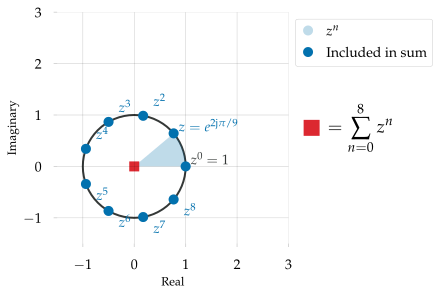

In [164]:
N = 9
theta = 2 * np.pi * np.arange(N) / N

z = np.exp(1j * theta)

zsum = np.cumsum(z)

fig, ax = plt.subplots(figsize=figaspect(0.5))

circ = patches.Ellipse((0, 0), 2, 2, color=colors[3], zorder=-10, fill=False, linewidth=2)
ax.add_patch(circ)
arc = patches.Wedge((0, 0), 1, 0, theta[1] * 180 / np.pi, zorder=-2, alpha=0.25)
ax.add_patch(arc)
points = ax.plot(z.real, z.imag, marker='o', linestyle='', alpha=0.25, label=r'$z^n$')[0]
sumpoints = ax.plot(z.real, z.imag, marker='o', linestyle='', color=colors[0], label='Included in sum')[0]
sumplot = ax.plot(zsum.real, zsum.imag, marker='s', zorder=-1, linestyle='')[0]
ax.text(z[1].real + 0.1, z[1].imag + 0.1, r'$z=e^{2\mathrm{j}\pi/9}$', color=colors[0],  va='center')
ax.text(z[0].real + 0.1, z[0].imag + 0.1, '$z^0 = 1$', color=colors[3], va='center')

for n in range(2, 9):    
    ax.text(z[n].real + 0.2, z[n].imag + 0.25 * np.sign(z[n].imag), f'$z^{n}$', color=colors[0], va='center')

ax.set(xlabel='Real', ylabel='Imaginary', xlim=[-1.5, 3], ylim=[-1.5, 3])
ax.set_aspect(1)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

txt = ax.text(1.17, 0.5, r'$=\displaystyle\sum_{n=0}^1 z^n$', size=18, transform=ax.transAxes, va='center')
ax.plot([1.10], [0.5], marker='s', color=colors[1],  markersize=16, transform=ax.transAxes, clip_on=False)

def init():
    return sumpoints, sumplot, txt

def animate(n):
    if n < N:
        sumpoints.set_data(z[:n+1].real, z[:n+1].imag)
    else:
        sumpoints.set_data(z.real, z.imag)
        
    sumplot.set_data([zsum[n].real], [zsum[n].imag])
    
    txt.set_text(r'$=\displaystyle\sum_{n=0}^' + '{:d}'.format(n) + ' z^n$')
    return sumpoints, sumplot, txt

animation = FuncAnimation(fig, animate, frames=N, init_func=init, blit=True, interval=10. / N * 1000)

glue('zsum', animation, display=False)

In [165]:
animation

```{glue:figure} zsum
:name: zsum

An example of the running summation $\displaystyle\sum_{n=0}^{N-1} z^n$ where $N=9$ and $z = e^{2\pi\cdot \mathrm{j} / 9}$.
The angle of $z$ (shaded region) is $2\pi\cdot 1 / N$, so this summation will total to 0.
```

### Proof of complex exponential summation

The theorem has an "if and only if" form, so we'll need to show both directions: 
- $(\Rightarrow)$ $\theta$ of the given form implies the summation must be zero, and
- $(\Leftarrow)$ the summation being zero implies $\theta$ takes the given form.

Note that $e^{\mathrm{j}\cdot n\cdot \theta} = \left(e^{\mathrm{j}\cdot\theta} \right)^n$ by the product rule for exponents.
If $\theta \not\equiv 0$ then $e^{\mathrm{j}\cdot\theta} \neq 1$, so we are allowed to use the geometric series identity with $z = e^{\mathrm{j}\cdot\theta}$:

```{math}
:label: exp-sum

\sum_{n=0}^{N-1} e^{\mathrm{j}\cdot n \cdot \theta} = \sum_{n=0}^{N-1} \left(e^{\mathrm{j}\cdot \theta}\right)^n
= \frac{1 - e^{\mathrm{j}\cdot N \cdot \theta}}{1 - e^{\mathrm{j}\cdot \theta}}.
```

$(\Rightarrow)$ If $\theta = 2\pi \cdot k/N$ for integer $k$, then the numerator can be equivalently expressed as

$$
\begin{align*}
1 - e^{\mathrm{j}\cdot N \cdot \theta} &= 1 - e^{\mathrm{j}\cdot N \cdot 2\pi \cdot k / N} & \text{substitute } \theta\\
&= 1 - e^{\mathrm{j} \cdot 2\pi \cdot k} & \text{cancel } N/N\\
&= 1 - e^{\mathrm{j} \cdot 0} & \text{cancel extra rotations } 2\pi \cdot k\\
&= 1 - 1\\
&= 0.
\end{align*}
$$
Since the numerator is 0, so too is the entire summation.

$(\Leftarrow)$ In the other direction, if we assume the summation is 0, then we must have

$$
0 = 1 - e^{\mathrm{j}\cdot N \cdot \theta} \quad \Rightarrow \quad e^{\mathrm{j}\cdot N \cdot \theta} = 1 = e^{\mathrm{j}\cdot 0},
$$

which implies $N \cdot \theta = 2\pi \cdot k$ for some integer $k$ because $N\cdot\theta$ must be equivalent to a whole number of rotations (in either direction).
Dividing through by $N$, we get $\theta = 2\pi \cdot k / N$.

## What about phase?

We can generalize the statement above to handle phase offsets as well.
Because the phase offset does not change with the sample index $n$, we can factor it out of the summation:

```{math}
:label: exp-sum-phase

\begin{align*}
\sum_{n=0}^{N-1} e^{\mathrm{j}\cdot(\theta\cdot n + \phi)} &= 
\sum_{n=0}^{N-1} e^{\mathrm{j}\cdot\theta\cdot n} \cdot  e^{\mathrm{j}\cdot \phi}\\
&= e^{\mathrm{j}\cdot \phi} \cdot \sum_{n=0}^{N-1} e^{\mathrm{j}\cdot\theta\cdot n} \\
&= e^{\mathrm{j}\cdot \phi} \cdot \frac{1 - e^{\mathrm{j}\cdot N \cdot \theta}}{1 - e^{\mathrm{j}\cdot \theta}}.
\end{align*}
```

This says that when a wave is shifted by $\phi$, the summation is multiplied by $e^{\mathrm{j}\cdot \phi}$.
Note that this is a pure rotation, so if the summation was 0 (i.e., we had an analysis frequency), then it will still be zero under *any* phase shift!
Likewise, if the summation was non-zero, it will remain non-zero under any shift.

## Back to the original question

The theorem above is for complex exponentials, which involve both a real and imaginary component.
However, our original question was about summations of general waves in standard form:

$$
\sum_{n=0}^{N-1} \cos\left(2\pi \cdot f \cdot \frac{n}{f_s} + \phi \right)
$$

For this, we can use the fact that $\cos(\theta)$ is equivalent to the real part of $e^{\mathrm{j}\cdot \theta}$, which implies
````{margin}
This is because for any complex number $z = a + \mathrm{j}\cdot b$, we have
```{math}
\begin{align*}
z + \overline{z} &= a + \mathrm{j}\cdot b + a - \mathrm{j}\cdot b\\
&= 2a,
\end{align*}
```
so the real part $a$ can be extracted by adding $z$ to its conjugate $\overline{z}$ and dividing by 2.
````
$$
\cos(\theta) = \frac{1}{2}\cdot \left( e^{\mathrm{j}\cdot \theta} + e^{-\mathrm{j}\cdot \theta}\right),
$$

or when a sample index $n$ and phase offset $\phi$ are introduced, and letting $\theta = 2\pi \cdot f / f_s$: 

$$
\cos(\theta \cdot n + \phi) = \frac{1}{2}\cdot \left( e^{\mathrm{j}\cdot (\theta\cdot n + \phi)} + e^{-\mathrm{j}\cdot (\theta\cdot n + \phi)} \right).
$$

By using {eq}`exp-sum-phase`, we can transform each part of this summation independently.
The end result is the rather unwieldy formula:

```{math}
:label: cosine-sum

\sum_{n=0}^{N-1} \cos(\theta \cdot n + \phi) = 
\frac{e^{\mathrm{j}\cdot \phi}}{2} \cdot \frac{1 - e^{\mathrm{j} \cdot N \cdot \theta}}{1 - e^{\mathrm{j}\cdot \theta}}
+ 
\frac{e^{-\mathrm{j}\cdot \phi}}{2} \cdot \frac{1 - e^{-\mathrm{j} \cdot N \cdot \theta}}{1 - e^{-\mathrm{j}\cdot \theta}}
```

## Why does this matter?

Many of the things we’d like to say about Fourier series depend on having waves “average out to zero”. For continuous (time) signals, we can show this kind of thing via symmetry arguments (like in {ref}`chapter 1 <averaging-wave>`), but when using discretely sampled signals, a bit more care must be taken.

The main theorem in this section tells us that waves at analysis frequencies always sum to 0, but in proving that theorem, we got as a byproduct a general equation {eq}`cosine-sum` for sums of waves at arbitrary (non-analysis) frequencies and phase offsets.
While this equation could be used in principle to bypass computing sums sample-by-sample, it is more useful as an analytical tool: it allows us to reason about the properties of the sum (e.g., whether it is 0 or non-zero, real or complex, etc) just by knowing the wave's parameters.